## Hyper paramenters in classification
1. **Input Layer shape**
2. **Hidden layer(s)**
3. **Neurons per hidden layer**
4. **Ouput layer shape**
    1. 1(since one class or the other)
    2. 1 per class (eg -3 for 3 class)
5. **Hidden Activation**
    1. Usually used RelU
    2. There are many other (check it out)
6. **Output Activation**
    1. Sigmoid for binary classification
    2. softmax for multi class classification
7. **Loss function**
    1. Cross Entropy for Binary class Classification
    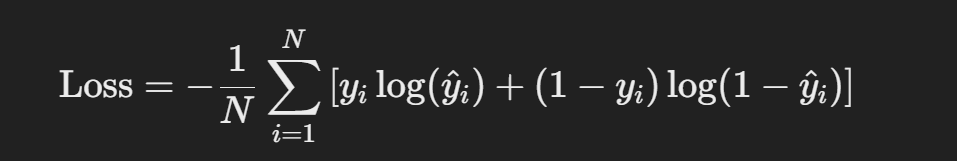

    2. Cross Entropy for Multiclass Classification
    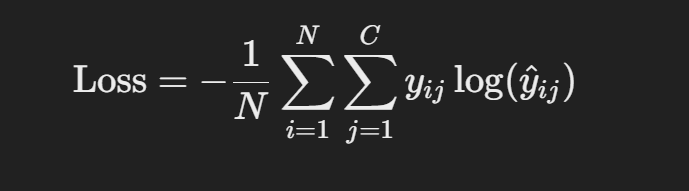
8. **Optimizer**
      SGD ,ADAM ....

# Classification Types
1. Binary classifications
2. Multiclass classifications
3. Multilabal classifications

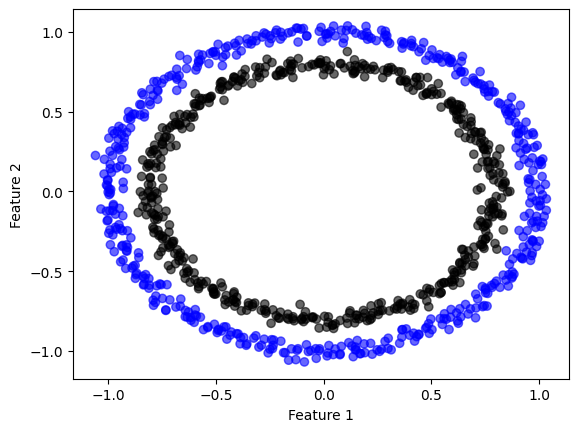

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
n_samples=1000
x,y=make_circles(n_samples, noise=0.03 ,random_state=42)

color_list = ["blue", "black"]
colors = [color_list[label] for label in y]
plt.scatter(x[:, 0], x[:, 1], c=colors, alpha=0.6)
# X[:,0] means for all rows of x first val
# X[:,1] means for all rows of x second val
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()

In [3]:
print("Input shape:->",x.shape)
print("Output shape->",y.shape)

print(x[:5])
print(y[:5])


X_train ,y_train = x[:800],y[:800]
X_test ,y_test = x[800:],y[800:]


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Input shape:-> (1000, 2)
Output shape-> (1000,)
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
[1 1 1 1 0]
(800, 2)
(200, 2)
(800,)
(200,)


In [4]:
import pandas as pd

circles =pd.DataFrame({"X0":x[:,0] ,"X1":x[:,1] ,"label":y})
circles

# print(circles.shape)

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [5]:
print(X_train[0].shape)
print(y_train[0].shape)

(2,)
()


In [6]:
## Steps in modelling
import tensorflow as tf
tf.random.set_seed(42)
model= tf.keras.Sequential([
    tf.keras.Input (shape=(2,)),
    tf.keras.layers.Dense(32 ,activation="relu"),

    tf.keras.layers.Dense(1 ,activation="sigmoid")
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),  # Binary cross-entropy for binary classification
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]   #metrics chnages for classification
)
# step3

history= model.fit(X_train , y_train  ,epochs=5)

Epoch 1/5
25/25 [==============================] - 1s 1ms/step - loss: 0.6862 - accuracy: 0.5188
Epoch 2/5
25/25 [==============================] - 0s 942us/step - loss: 0.6689 - accuracy: 0.6687
Epoch 3/5
25/25 [==============================] - 0s 923us/step - loss: 0.6494 - accuracy: 0.6625
Epoch 4/5
25/25 [==============================] - 0s 944us/step - loss: 0.6252 - accuracy: 0.8000
Epoch 5/5
25/25 [==============================] - 0s 887us/step - loss: 0.5966 - accuracy: 0.7300


In [7]:
import numpy as np

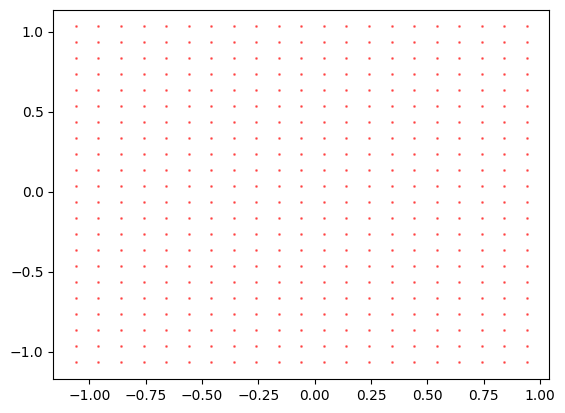

In [8]:

x_min =x[:,0].min();
x_max=x[:,0].max();
y_min =x[:,1].min();
y_max=x[:,1].max();


xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1))


plt.scatter(xx, yy, color='red', s=1, alpha=0.5, label='Mesh Grid Points')


7/7 [==============================] - 0s 947us/step
[[0.42206207]
 [0.54745793]
 [0.4282896 ]
 [0.5387158 ]
 [0.30424818]]
Testing the data on X_test and y_test
53/53 [==============================] - 0s 751us/step
Binary Classification


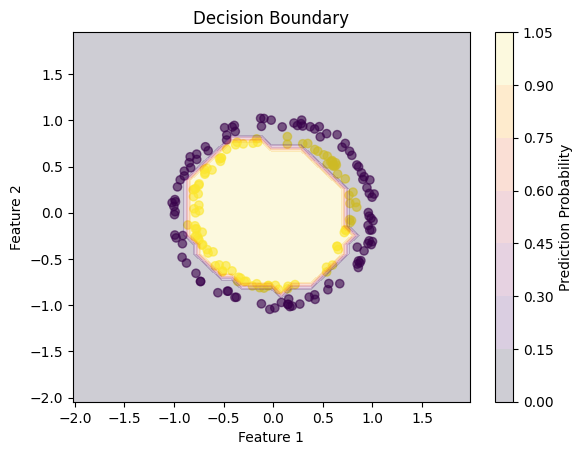

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def creating_decision_line(X, y, model):
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1


    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    grid_points = np.c_[xx.ravel(), yy.ravel()] #make xx and yy comnbine into 2d
    y_pred = model.predict(grid_points)

    if len(y_pred[0]) > 1:
        print("Multiclass Classification")
        y_pred = np.argmax(y_pred, axis=1)
        y_pred=y_pred.reshape(xx.shape)
    else:
        print("Binary Classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap='inferno', alpha=0.2)
    plt.colorbar(label="Prediction Probability")

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

# Example usage
y_preds = model.predict(X_test)
print(y_preds[:5])

print("Testing the data on X_test and y_test")
creating_decision_line(X_test, y_test, model)


In [10]:
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy
0,0.686208,0.51875
1,0.668912,0.66875
2,0.649430,0.66250
3,0.625151,0.80000
4,0.596616,0.73000


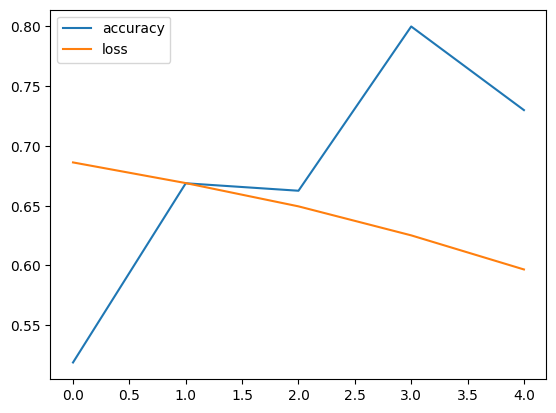

In [11]:
plt.show("Model training curves")
plt.plot(history.history["accuracy"] ,label="accuracy")
plt.plot(history.history["loss"] ,label="loss")
plt.legend()
plt.show()

## How to find the best Learning Rate

#### Aside from the architecture itself ,the layes ,the number of neurons , activations etc ,the most important hyperparameter is **learning rate**.

#### Deep Leanring means experiment ,You build a model and evaluate it and build and evaluate and so on .....

There is a trick which will help you find the optimal Learning rate(at least to begin training with)

## What will we do for learning rate

Early in training, the model is far from optimal, and a relatively high learning rate helps make large updates to the weights to quickly move toward a good region in the loss landscape.
As training progresses, reducing the learning rate allows the model to make smaller, more precise adjustments to the weights, helping it converge to a minimum (ideally, a global minimum).

# Finding the best learning rate

**Callbacks**: Extra piece of functionality , you can add to your model while training

we are suing learning rate callback


In [12]:
# def scheduler(epoch ,lr):
#   if(epoch<10):
#     return float(lr)
#   else :
#     return float(lr*tf.math.exp(-0.1))

def scheduler(epoch):
    return 1e-4 * 10**(epoch / 20)


In [13]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(4 ,activation="relu"),
    tf.keras.layers.Dense(4 ,activation="relu"),
    tf.keras.layers.Dense(1 ,activation="sigmoid")
])



model_2.compile(loss=tf.keras.losses.BinaryCrossentropy() ,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
)


lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)



history_2= model_2.fit(X_train , y_train  ,epochs=100 ,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 993us/step - loss: 0.6915 - accuracy: 0.5088 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 908us/step - loss: 0.6914 - accuracy: 0.5125 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 941us/step - loss: 0.6912 - accuracy: 0.5138 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 960us/step - loss: 0.6911 - accuracy: 0.5113 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.5088 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.5088 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.5088 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.5125 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step

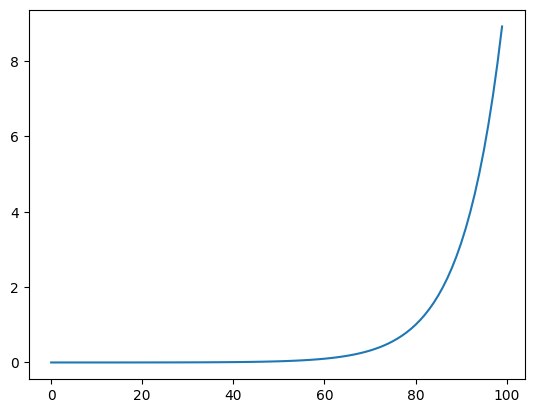

In [15]:
plt.plot(history_2.history["lr"])

<AxesSubplot: >

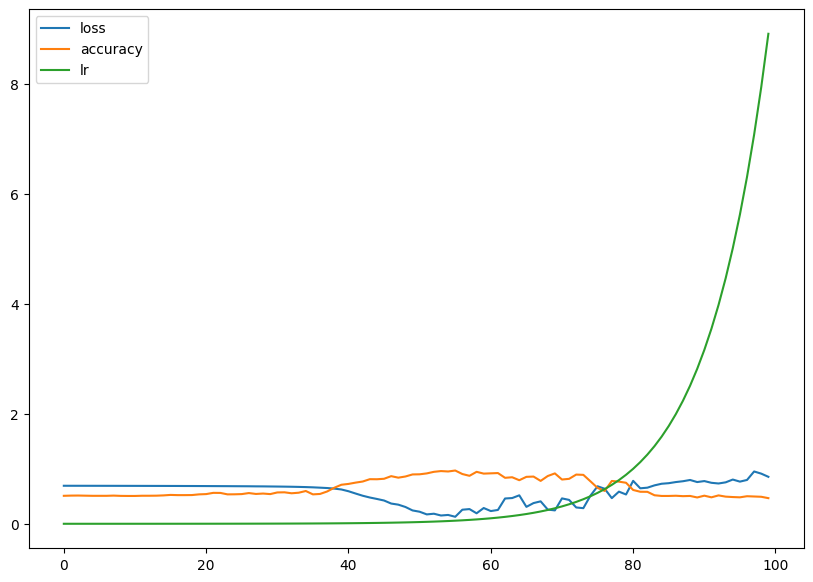

In [16]:
pd.DataFrame(history_2.history).plot(figsize=(10,7))

Text(0.5, 1.0, 'Lr vs loss')

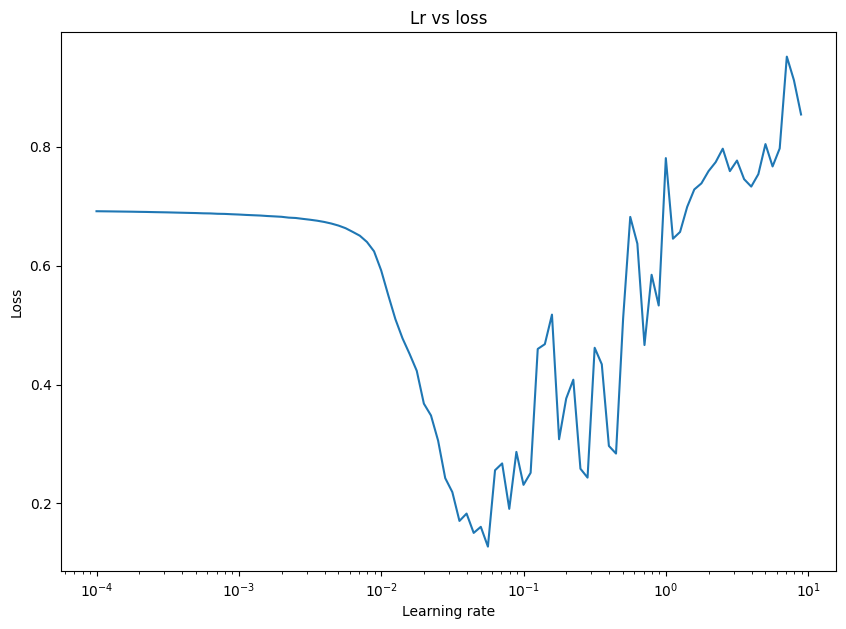

In [18]:


lrs=history_2.history["lr"]
plt.figure(figsize=(10,7))
plt.semilogx(lrs ,history_2.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Lr vs loss")

# Ideal learning rate is along the downward slope that is sliglty greater than 0.01

# Othere examples of learnign rate
0.1 0.01 0.001 0.0001

So either try all these or find ideal learning rate using scheduler

## Other evaluations

**1**. Accuracy

**2**. Recall

**3**. Precision

**4**. F1-score

**5**. Confusion matrix


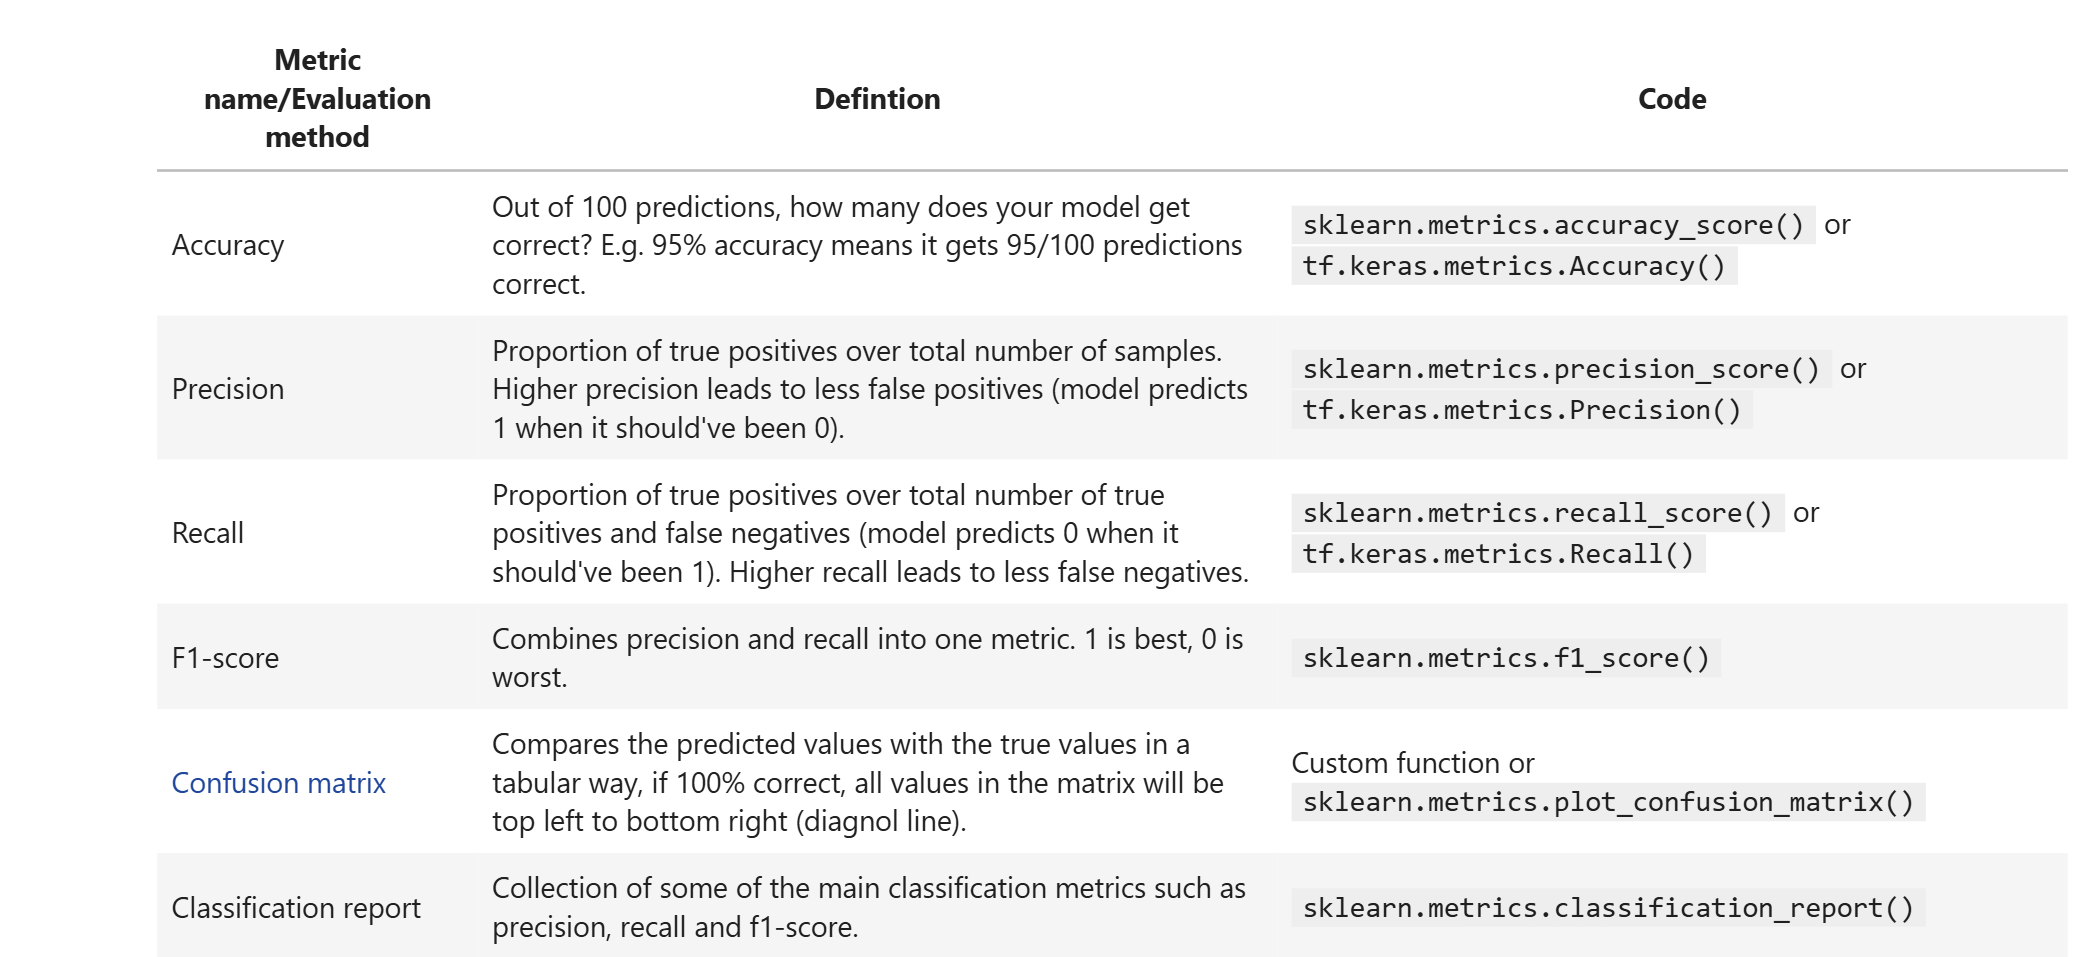

In [19]:
loss ,accuracy = model.evaluate(X_test ,y_test)
print(f"Model loss on the test set:{loss}")
print(f"Model accuracy on the test set :{(accuracy*100):.2f}")

7/7 [==============================] - 0s 1ms/step - loss: 0.5744 - accuracy: 0.8350
Model loss on the test set:0.5743893384933472
Model accuracy on the test set :83.50


In [20]:
## Creating Confusion Matrix

from sklearn.metrics import confusion_matrix

y_preds=model.predict(X_test)

y_preds=tf.round(y_preds)


confusion_matrix=confusion_matrix(y_test ,y_preds)
print(confusion_matrix)

7/7 [==============================] - 0s 1ms/step
[[101   0]
 [ 33  66]]


#### make pretty

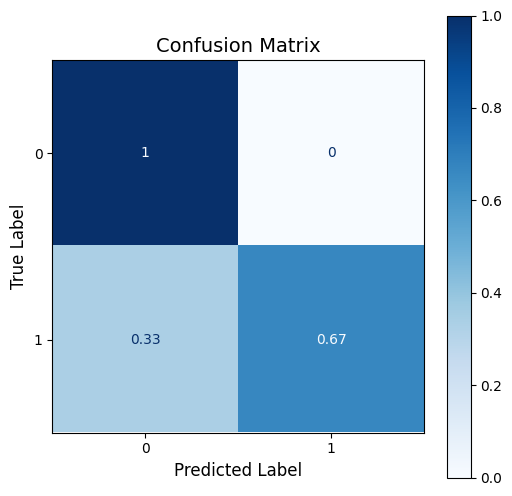

In [21]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

def conf_perc(conf_matrix):
    # Normalize by row (each row is divided by the row sum)
    row_sums = tf.reduce_sum(conf_matrix, axis=1, keepdims=True)
    return conf_matrix / row_sums

confusion_metrics_percentage= conf_perc(confusion_matrix).numpy()

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_metrics_percentage, display_labels=[0, 1])

# Plot with a blue color map (light to dark blue)
fig, ax = plt.subplots(figsize=(6, 6))
cm_display.plot(cmap=plt.cm.Blues, ax=ax)

plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)

plt.show()